In [1]:
import numpy as np

# Generating some 3-dimensional sample data

In [2]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [3]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [4]:
class2_sample

array([[ 0.44641684,  1.75129468,  1.64186275,  1.46036493,  0.55601883,
        -0.28830501,  1.5033904 ,  1.90130815, -0.47401284,  2.66666473,
         1.81839939,  1.42616404,  0.80963423,  1.65692677,  0.98463494,
         2.43729876, -2.23019481,  0.19765921,  0.23510277,  0.62843572],
       [ 0.9030436 ,  0.75305209,  0.49591969,  0.8688576 ,  0.83159555,
         0.29991009,  1.79406375, -1.10219869,  0.42771987,  0.74468076,
         2.03644676,  2.02221826,  1.08761184,  1.40534554,  2.05223433,
         0.29720548,  0.7595644 ,  0.92398938,  1.06963619, -0.45074891],
       [ 0.26206029,  1.99196343,  1.28919892,  1.34719079,  0.2951104 ,
         2.6618853 ,  1.01336582,  1.02839535, -0.38079564,  2.38340244,
         1.00832329, -0.28542508,  1.44131219,  2.42043438,  1.00434314,
        -0.98937777,  2.39295483,  1.30322077, -0.43385989,  1.72012443]])

In [5]:
class1_sample[0]

array([-0.38285495,  0.7894254 , -0.71045643, -2.57641957, -0.37927471,
        0.90728674,  1.61854593, -0.54760917, -0.43200936, -0.2964595 ,
        0.9998514 ,  1.19098988, -0.53082418, -0.78840658, -0.7142975 ,
        0.86552989, -1.41453921,  0.58524249, -0.53247958,  1.65242535])

Populating the interactive namespace from numpy and matplotlib


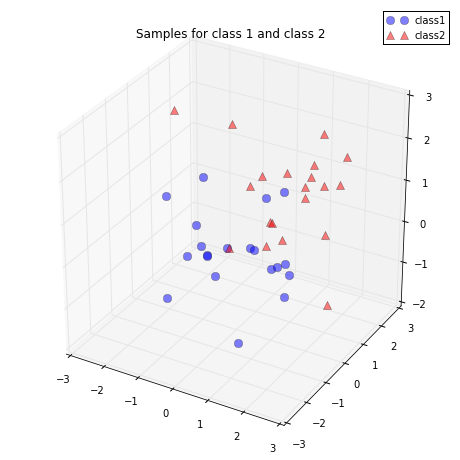

In [6]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

# 1. Taking the whole dataset ignoring the class labels

In [7]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has now the dimensions 3x40"

In [8]:
print all_samples.shape

(3L, 40L)


# 2. Computing the d-dimensional mean vector

In [9]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

('Mean Vector:\n', array([[ 0.46081827],
       [ 0.3939643 ],
       [ 0.45800019]]))


In [10]:
mean_vector

array([[ 0.46081827],
       [ 0.3939643 ],
       [ 0.45800019]])

# 3. Computing the Scatter Matrix

In [11]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

('Scatter Matrix:\n', array([[ 56.33010804,   6.67277562,   9.16417758],
       [  6.67277562,  48.56925708,   4.57202915],
       [  9.16417758,   4.57202915,  50.43386221]]))


## Computing the Covariance Matrix (alternatively to the scatter matrix)

In [12]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

('Covariance Matrix:\n', array([[ 1.44436174,  0.17109681,  0.23497891],
       [ 0.17109681,  1.24536557,  0.11723152],
       [ 0.23497891,  0.11723152,  1.29317595]]))


In [13]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.74006157]
 [ 0.40866252]
 [ 0.5341384 ]]
Eigenvalue 1 from scatter matrix: 66.6290517058
Eigenvalue 1 from covariance matrix: 1.70843722322
('Scaling factor: ', 38.999999999999986)
----------------------------------------
Eigenvector 2: 
[[ 0.63384483]
 [-0.15831108]
 [-0.75708542]]
Eigenvalue 2 from scatter matrix: 43.7174949933
Eigenvalue 2 from covariance matrix: 1.12096141008
('Scaling factor: ', 39.000000000000043)
----------------------------------------
Eigenvector 3: 
[[ 0.2248324 ]
 [-0.89885068]
 [ 0.37618857]]
Eigenvalue 3 from scatter matrix: 44.9866806212
Eigenvalue 3 from covariance matrix: 1.15350463131
('Scaling factor: ', 38.999999999999986)
----------------------------------------


# 4. Computing eigenvectors and corresponding eigenvalues

In [14]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.74006157]
 [ 0.40866252]
 [ 0.5341384 ]]
Eigenvalue 1 from scatter matrix: 66.6290517058
Eigenvalue 1 from covariance matrix: 1.70843722322
('Scaling factor: ', 38.999999999999986)
----------------------------------------
Eigenvector 2: 
[[ 0.63384483]
 [-0.15831108]
 [-0.75708542]]
Eigenvalue 2 from scatter matrix: 43.7174949933
Eigenvalue 2 from covariance matrix: 1.12096141008
('Scaling factor: ', 39.000000000000043)
----------------------------------------
Eigenvector 3: 
[[ 0.2248324 ]
 [-0.89885068]
 [ 0.37618857]]
Eigenvalue 3 from scatter matrix: 44.9866806212
Eigenvalue 3 from covariance matrix: 1.15350463131
('Scaling factor: ', 38.999999999999986)
----------------------------------------


In [15]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [16]:
mean_x

0.46081827017343446

Populating the interactive namespace from numpy and matplotlib


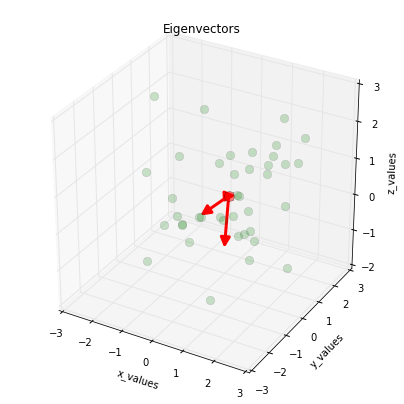

In [17]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

# 5.1. Sorting the eigenvectors by decreasing eigenvalues

In [18]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [19]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

66.6290517058
44.9866806212
43.7174949933


# 5.2. Choosing k eigenvectors with the largest eigenvalues

In [20]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[ 0.74006157,  0.2248324 ],
       [ 0.40866252, -0.89885068],
       [ 0.5341384 ,  0.37618857]]))


# 6. Transforming the samples onto the new subspace

In [21]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

In [28]:
transformed.shape

(2L, 40L)

In [32]:
transformed.T

array([[-0.55461193,  1.01842735],
       [ 1.28740417,  0.56812613],
       [-1.00731287, -0.67518752],
       [-1.44957936, -1.23873808],
       [-0.12423276, -1.59789526],
       [ 0.5858056 ,  0.98006678],
       [-0.30207674,  2.51663471],
       [-0.4401777 , -0.68299288],
       [-0.64816113,  0.51886844],
       [-0.1621021 , -2.81275413],
       [ 0.63185219, -0.22576711],
       [ 0.415741  , -0.4333109 ],
       [-1.58871228,  1.96646894],
       [-0.56183201,  0.61502427],
       [-0.81799547, -0.08352015],
       [ 1.57618934, -0.14921082],
       [-1.40284255, -0.49176417],
       [ 0.51614388, -1.52711725],
       [ 0.25217834,  1.17516255],
       [ 0.99712509,  0.53022817],
       [ 0.83939248, -0.6127483 ],
       [ 2.6677942 ,  0.46622028],
       [ 2.10635395,  0.4083681 ],
       [ 2.15541582,  0.05416189],
       [ 0.90895989, -0.51145202],
       [ 1.3310137 ,  0.66697613],
       [ 2.38704565, -0.89336791],
       [ 1.50596324,  1.8050583 ],
       [-0.37940318,

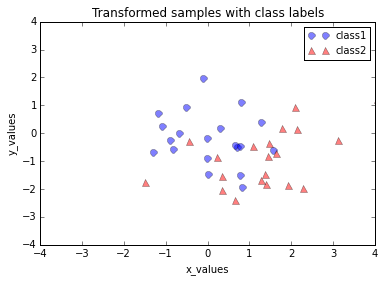

In [21]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Using the PCA() class from the matplotlib.mlab library

('PC axes in terms of the measurement axes scaled by the standard deviations:\n', array([[ 0.7106579 ,  0.13435873,  0.69058894],
       [ 0.04752348,  0.97018502, -0.23766057],
       [-0.70193082,  0.20171455,  0.68308445]]))


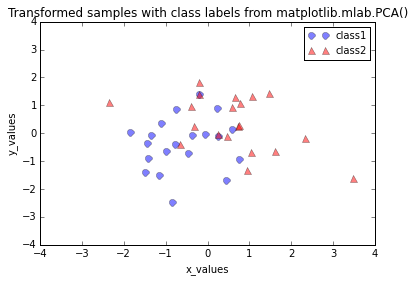

In [23]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

# Differences between the step by step approach and matplotlib.mlab.PCA()
### When we plot the transformed dataset onto the new 2-dimensional subspace, we observe that the scatter plots from our step by step approach and the matplotlib.mlab.PCA() class do not look identical. This is due to the fact that matplotlib.mlab.PCA() class scales the variables to unit variance prior to calculating the covariance matrices. This will/could eventually lead to different variances along the axes and affect the contribution of the variable to principal components.

### One example where a scaling would make sense would be if one variable was measured in the unit inches where the other variable was measured in cm. However, for our hypothetical example, we assume that both variables have the same (arbitrary) unit, so that we skipped the step of scaling the input data.

# Using the PCA() class from the sklearn.decomposition library to confirm our results

In [30]:
all_samples.shape

(3L, 40L)

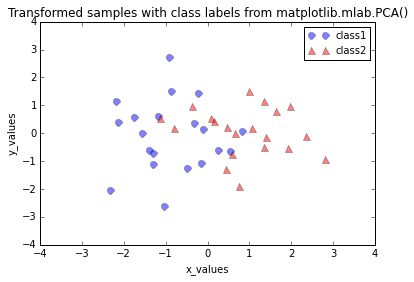

In [23]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [27]:
sklearn_transf.shape

(40L, 2L)

In [31]:
sklearn_transf

array([[-1.30127975, -1.09664111],
       [ 0.54073635, -0.64633989],
       [-1.75398069,  0.59697376],
       [-2.19624718,  1.16052432],
       [-0.87090058,  1.5196815 ],
       [-0.16086222, -1.05828054],
       [-1.04874456, -2.59484847],
       [-1.18684552,  0.60477912],
       [-1.39482894, -0.59708219],
       [-0.90876992,  2.73454037],
       [-0.11481563,  0.14755335],
       [-0.33092681,  0.35509714],
       [-2.3353801 , -2.0446827 ],
       [-1.30849982, -0.69323802],
       [-1.56466329,  0.00530639],
       [ 0.82952153,  0.07099706],
       [-2.14951037,  0.41355041],
       [-0.23052394,  1.44890349],
       [-0.49448947, -1.25337631],
       [ 0.25045727, -0.60844193],
       [ 0.09272466,  0.53453454],
       [ 1.92112638, -0.54443404],
       [ 1.35968613, -0.48658186],
       [ 1.40874801, -0.13237565],
       [ 0.16229207,  0.43323826],
       [ 0.58434588, -0.74518989],
       [ 1.64037783,  0.81515415],
       [ 0.75929543, -1.88327206],
       [-1.126071  ,

In [25]:
print(sklearn_pca.explained_variance_ratio_) 

[ 0.42894269  0.28961402]


### the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, both we can simply multiply the transformed data by ×(−1)×(−1) to revert the mirror image.

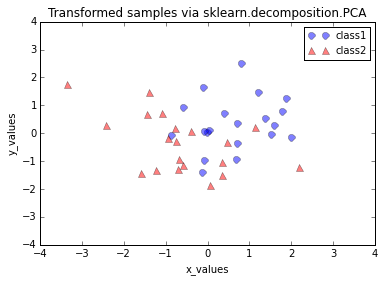

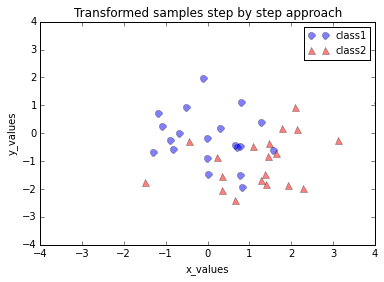

In [25]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()

## The PCA does an unsupervised dimensionality reduction, while the logistic regression does the prediction.

In [34]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

Automatically created module for IPython interactive environment


In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [36]:
logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [38]:
X_digits

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

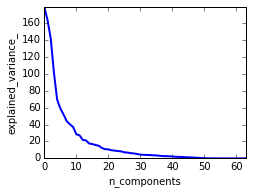

In [37]:
###############################################################################
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

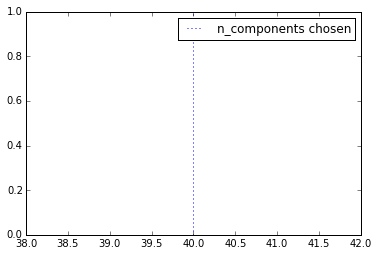

In [39]:
###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()